In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction to Simulation-Based Inference

Until the advent of powerful and accessible computing methods, experimenters often faced a challenging dilemma. They had to either:
1. Describe an accurate model of a phenomenon, which usually made computing explicit answers infeasible, or
2. Choose a simplified standard model that allowed for computation but may not realistically represent the phenomenon.

This dilemma is prevalent across various fields such as electrical engineering, aeronautics, biology, network studies, and astronomy. To address the limitations of traditional methods, researchers in these fields developed customized approaches to model fitting tailored to their specific problems. For instance, physicists pioneered **Markov chain Monte Carlo methods** to address these challenges. However, traditional numerical analysis techniques are often ill-suited for such scenarios.

In this chapter, we explore statistical models and procedures that have driven the development of simulation-based inference. The first section introduces statistical models, followed by sections discussing various statistical methods, with an emphasis on computational difficulties associated with each method. The final section covers deterministic numerical analysis techniques.

## 1.1 Statistical Models

In purely statistical setups, computational challenges arise both at the level of probabilistic modeling of the phenomenon and at the level of statistical inference (e.g., estimation, prediction, testing, variable selection).

### Censored Data Models

Censored data models present missing data scenarios where densities are not directly observed. Analyzing censored data models


# Complex Statistical Models and Simulation-Based Inference

In some cases, developing a detailed representation of the causes behind a phenomenon, such as including explanatory variables, can result in a probabilistic structure that is **too complex for parametric modeling**. This complexity prevents obtaining closed-form estimates for quantities of interest. Such scenarios are common in **expert systems** in fields like medicine, physics, and finance, as well as in **graphical models** used in complex probabilistic frameworks (e.g., Pearl (1988), Robert (1991), Spiegelhalter et al. (1993), Lauritzen (1996)).

Another example is **latent variable models** in econometrics, where even simple models can evolve into highly complex forms when certain variables are aggregated or removed. In these situations, simulation methods become necessary to perform inference. A popular estimation technique for latent variable models is the **Expectation-Maximization (EM) algorithm** (Dempster et al., 1977), which is discussed in Chapter 3.

### Example: Censored Data Models

Censored data models illustrate common missing data scenarios. In these models, densities are not sampled directly, requiring complex computations that generally prevent analytical solutions.

In a basic statistical model, we would observe random variables $ Y_1, Y_2, \ldots, Y_n $, independently drawn from a population with distribution $ f(y; \theta) $. The sample distribution would be expressed as:

$$
\prod_{i=1}^{n} f(y_i; \theta)
$$

Inference about $ \theta $ relies on this distribution.

However, in fields such as medical statistics, **censored random variables** frequently appear. Instead of observing $ Y_i $, we observe $ Y_i^* = \min(Y_i, u) $, where $ u $ is a constant (e.g., maximum observation time). For instance, if $ Y $ is a patient’s survival time in a study limited to $ u = 5 $ years, survival times beyond 5 years are censored at $ u $, making sample density evaluation more challenging.

### Types of Censoring

The relation between censored data and an unobserved model $ Y_i \sim f(\theta) $ defines different types of censoring:

1. **Truncation**: We observe $ Y^* = \min(Y, u) $, where $ u $ is the maximum observation duration or the lowest measurable concentration.
2. **Inclusion Probability**: Original variables $ Y $ remain in the sample with probability $ p(y) $, with the count of censored variables either known or unknown.
3. **Auxiliary Variables**: Observations $ Y $ are linked with auxiliary variables $ X $, so that $ Y = h(Y, T) $, where $ h(Y, x) = \min(Y, x) $.

---

This introduction highlights the necessity of simulation-based methods in statistical analysis where direct, closed-form solutions are impractical due to model complexity.

## Censored Observations and Truncated Data Distributions

### Types of Censoring and Truncation

Censoring in data occurs when observations are only partially known, often due to limits in measurement or study duration. Below are key types of censoring based on truncated observations.

1. **Truncation at a Point $ u $:**
   Given random variables $ Y_1 $ (e.g., times of observation or concentrations), actual observations $ Y $ are:

   $$
   Y = \min(Y_1, u)
   $$

   where $ u $ is the truncation point, such as maximum observation duration or smallest measurable concentration.

2. **Selective Sampling with Probability $ p(y) $:**
   Original variables $ Y_i $ are retained in the sample with probability $ p(y_i) $, and the count of censored observations may be either known or unknown.

3. **Auxiliary Variable Association:**
   Observations $ Y_i $ are linked with auxiliary variables $ X_i $ by a function $ y = h(Y_i, T_i) $, typically using:

   $$
   h(Y, X) = \min(Y, X)
   $$

   The knowledge of truncation, \( I(Y > X) \), may be available or unknown.

### Example: Distribution with Normal Variables

Suppose $ X \sim N(0, \sigma^2) $ and $ Y \sim N(\mu, \tau^2) $. Then, for the censored variable $ Z = X \wedge Y = \min(X, Y) $, the distribution of $ Z $ is given by:

$$
f_Z(z) = \phi(z; \mu, \tau) \Phi\left(\frac{z - \mu}{\sigma}\right) + \left[1 - \Phi\left(\frac{z - \mu}{\sigma}\right)\right] \cdot \phi(z; 0, \sigma)
$$

where:
- $ \phi $ is the **density of the standard normal** distribution $ N(0, 1) $,
- $ \Phi $ is the **cumulative distribution function (CDF)** of the normal distribution.

This computation can be complex for arbitrary values of $ z $.

### Example: Weibull Distributed Variable

For $ X $ with a **Weibull distribution** with parameters $ \alpha $ and $ \beta $, the density function is:

$$
f(x) = \alpha \beta x^{\alpha - 1} e^{-\beta x}
$$

For the censored variable $ Z = X \wedge w $, with constant $ w $, the density is:

$$
f_Z(z) = \alpha \beta z^{\alpha - 1} e^{-\beta z} I(z < w) + \left(1 - \Phi(w)\right) \delta(z - w)
$$

where $ \delta(z) $ is the **Dirac delta function** representing the probability mass at $ w $. This form of distribution is commonly used in **quality control** and **longitudinal studies**.

### Computational Challenges in Censored Data

For large samples $ (X_1, X_2, \dots, X_n) $, the additive structure of the density may prevent efficient computation. Here, “explicit” means **computable in reasonable time**, a requirement not met for complex models.



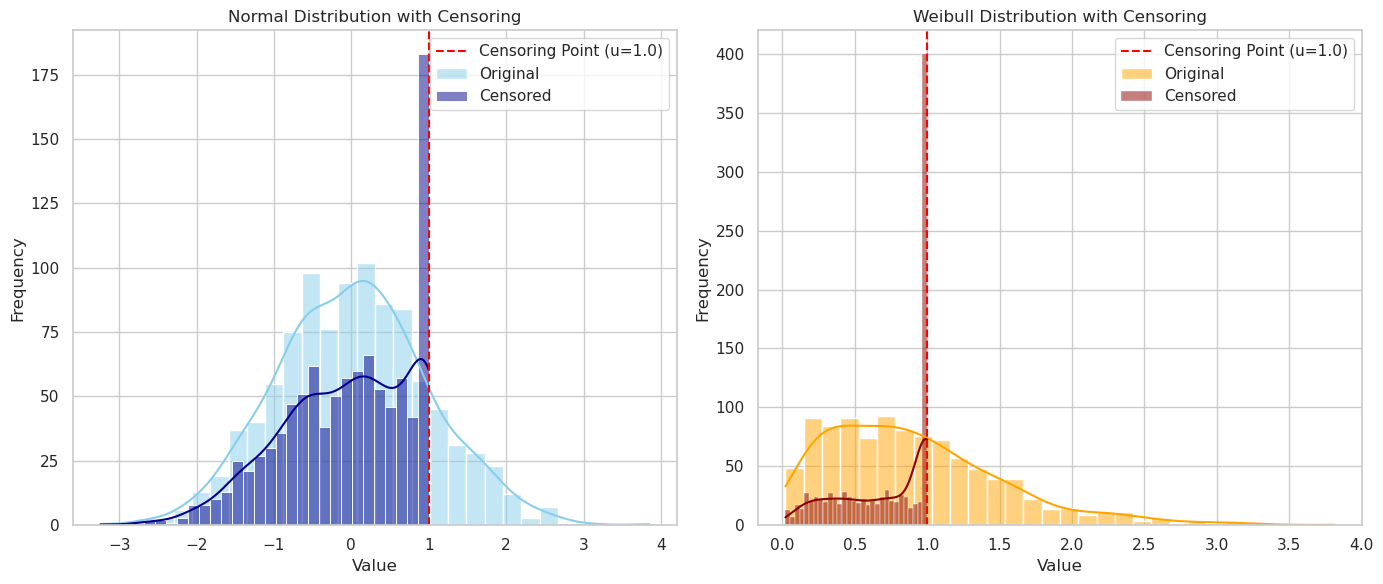

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Set style for plots
sns.set(style="whitegrid")

# Parameters for distributions
mu, sigma = 0, 1  # Mean and standard deviation for the normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point for both distributions

# Function to censor data at point `u`
def censor_data(data, u):
    return np.minimum(data, u)

# Generate data from normal and Weibull distributions
np.random.seed(42)  # For reproducibility
normal_data = np.random.normal(mu, sigma, 1000)
weibull_data = np.random.weibull(alpha, 1000) * beta

# Apply censoring to both distributions
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# Plot the original and censored normal distribution data
plt.figure(figsize=(14, 6))

# Subplot for Normal distribution
plt.subplot(1, 2, 1)
sns.histplot(normal_data, bins=30, color="skyblue", kde=True, label="Original")
sns.histplot(censored_normal_data, bins=30, color="darkblue", kde=True, label="Censored")
plt.axvline(u, color="red", linestyle="--", label=f"Censoring Point (u={u})")
plt.title("Normal Distribution with Censoring")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Subplot for Weibull distribution
plt.subplot(1, 2, 2)
sns.histplot(weibull_data, bins=30, color="orange", kde=True, label="Original")
sns.histplot(censored_weibull_data, bins=30, color="darkred", kde=True, label="Censored")
plt.axvline(u, color="red", linestyle="--", label=f"Censoring Point (u={u})")
plt.title("Weibull Distribution with Censoring")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import random
import math

# Parameters
mu, sigma = 0, 1  # Mean and standard deviation for normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point
n_samples = 1000  # Number of samples

# Helper functions for distributions
def generate_normal(mu, sigma, n):
    """Generates n samples from a normal distribution using the Box-Muller transform."""
    data = []
    for _ in range(n):
        # Generate two uniform random numbers between 0 and 1
        u1, u2 = random.random(), random.random()
        # Box-Muller transform to generate standard normal values
        z0 = (2 * u1 - 1) ** 0.5 * math.cos(2 * math.pi * u2)
        z1 = (2 * u1 - 1) ** 0.5 * math.sin(2 * math.pi * u2)
        # Scale by mean and standard deviation
        data.append(mu + z0 * sigma)
    return data

def generate_weibull(alpha, beta, n):
    """Generates n samples from a Weibull distribution."""
    data = []
    for _ in range(n):
        # Inverse transform sampling for Weibull
        u = random.random()
        data.append(beta * (-math.log(1 - u)) ** (1 / alpha))
    return data

# Censoring function
def censor_data(data, u):
    """Censors data at the truncation point u."""
    # Ensure we only have real values and handle complex cases
    return [min(x.real if isinstance(x, complex) else x, u) for x in data]

# Generate samples
normal_data = generate_normal(mu, sigma, n_samples)
weibull_data = generate_weibull(alpha, beta, n_samples)

# Apply censoring
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# ASCII-based plotting
def plot_histogram(data, bins, title):
    """Plots a simple ASCII histogram of the data."""
    # Ensure that we're working with real values only
    data = [x.real if isinstance(x, complex) else x for x in data]
    
    # Calculate histogram bins
    min_data, max_data = min(data), max(data)
    bin_size = (max_data - min_data) / bins
    histogram = [0] * bins

    # Populate histogram bins
    for value in data:
        index = int((value - min_data) / bin_size)
        if index == bins:  # Edge case where value is exactly max_data
            index -= 1
        histogram[index] += 1

    # Find max bin count for scaling
    max_count = max(histogram)
    
    # Display histogram
    print(title)
    for i, count in enumerate(histogram):
        # Bin range
        range_min = min_data + i * bin_size
        range_max = range_min + bin_size
        # ASCII bar
        bar = "#" * int(50 * count / max_count)
        print(f"{range_min:.2f} - {range_max:.2f}: {bar}")

# Plot original and censored data for both distributions
print("Normal Distribution (Original)")
plot_histogram(normal_data, bins=20, title="Normal Distribution (Original)")

print("\nNormal Distribution (Censored)")
plot_histogram(censored_normal_data, bins=20, title="Normal Distribution (Censored)")

print("\nWeibull Distribution (Original)")
plot_histogram(weibull_data, bins=20, title="Weibull Distribution (Original)")

print("\nWeibull Distribution (Censored)")
plot_histogram(censored_weibull_data, bins=20, title="Weibull Distribution (Censored)")


Normal Distribution (Original)
Normal Distribution (Original)
-0.99 - -0.89: 
-0.89 - -0.79: #
-0.79 - -0.70: #
-0.70 - -0.60: ###
-0.60 - -0.50: ##
-0.50 - -0.40: ###
-0.40 - -0.30: ###
-0.30 - -0.20: ###
-0.20 - -0.10: ##
-0.10 - -0.01: ###
-0.01 - 0.09: ##################################################
0.09 - 0.19: ###
0.19 - 0.29: ##
0.29 - 0.39: ##
0.39 - 0.49: ###
0.49 - 0.58: ##
0.58 - 0.68: #
0.68 - 0.78: ##
0.78 - 0.88: ##
0.88 - 0.98: #

Normal Distribution (Censored)
Normal Distribution (Censored)
-0.99 - -0.89: 
-0.89 - -0.79: #
-0.79 - -0.70: #
-0.70 - -0.60: ###
-0.60 - -0.50: ##
-0.50 - -0.40: ###
-0.40 - -0.30: ###
-0.30 - -0.20: ###
-0.20 - -0.10: ##
-0.10 - -0.01: ###
-0.01 - 0.09: ##################################################
0.09 - 0.19: ###
0.19 - 0.29: ##
0.29 - 0.39: ##
0.39 - 0.49: ###
0.49 - 0.58: ##
0.58 - 0.68: #
0.68 - 0.78: ##
0.78 - 0.88: ##
0.88 - 0.98: #

Weibull Distribution (Original)
Weibull Distribution (Original)
0.01 - 0.22: #################

In [ ]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
mu, sigma = 0, 1  # Mean and standard deviation for normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point
n_samples = 1000  # Number of samples

# Helper functions for distributions
def generate_normal(mu, sigma, n):
    """Generates n samples from a normal distribution using the Box-Muller transform."""
    data = []
    for _ in range(n):
        # Generate two uniform random numbers between 0 and 1
        u1, u2 = random.random(), random.random()
        # Box-Muller transform to generate standard normal values
        z0 = (2 * u1 - 1) ** 0.5 * math.cos(2 * math.pi * u2)
        z1 = (2 * u1 - 1) ** 0.5 * math.sin(2 * math.pi * u2)
        # Scale by mean and standard deviation
        data.append(mu + z0 * sigma)
    return data

def generate_weibull(alpha, beta, n):
    """Generates n samples from a Weibull distribution."""
    data = []
    for _ in range(n):
        # Inverse transform sampling for Weibull
        u = random.random()
        data.append(beta * (-math.log(1 - u)) ** (1 / alpha))
    return data

# Censoring function
def censor_data(data, u):
    """Censors data at the truncation point u."""
    return [min(x.real if isinstance(x, complex) else x, u) for x in data]

# Generate samples
normal_data = generate_normal(mu, sigma, n_samples)
weibull_data = generate_weibull(alpha, beta, n_samples)

# Apply censoring
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# Plot using Seaborn
def plot_seaborn_histogram(data, title):
    """Plots a histogram using Seaborn."""
    sns.histplot(data, kde=False, bins=20, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot original and censored data for both distributions
print("Normal Distribution (Original)")
plot_seaborn_histogram(normal_data, title="Normal Distribution (Original)")

print("\nNormal Distribution (Censored)")
plot_seaborn_histogram(censored_normal_data, title="Normal Distribution (Censored)")

print("\nWeibull Distribution (Original)")
plot_seaborn_histogram(weibull_data, title="Weibull Distribution (Original)")

print("\nWeibull Distribution (Censored)")
plot_seaborn_histogram(censored_weibull_data, title="Weibull Distribution (Censored)")


### Mixture Models (Example 2)

In a mixture model, observations $ X_i $ are assumed to be generated from one of $ k $ elementary distributions $ f_i $, with probability $ p_i $. The overall density is represented as a weighted sum of these distributions:

$$
f_X(x) = \sum_{i=1}^{k} p_i f_i(x)
$$

If we observe a sample of independent random variables $ (X_1, X_2, \dots, X_n) $, the sample density is given by:

$$
L(\theta) = \prod_{i=1}^{n} \left( \sum_{j=1}^{k} p_j f_j(x_i) \right)
$$

Where $ \theta = (p_1, p_2, \dots, p_k) $ are the parameters of the mixture, and the likelihood function involves computing the weighted sum of the densities for each observation. In cases where the number of components $ k $ is large, evaluating this likelihood function can become computationally expensive due to the $ O(k^n) $ complexity.

### Moving Average Model (Example 3)

A moving average (MA) model of order $ q $ is given by:

$$
X_t = \mu + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t
$$

Where:
- $ X_t $ is the observed value at time $ t $,
- $ \mu $ is a constant mean,
- $ \theta_j $ are the parameters of the model,
- $ \epsilon_t $ are iid random variables $ \epsilon_t \sim \mathcal{N}(0, \sigma^2) $.

The sample density for an observed sample $ (X_1, X_2, \dots, X_n) $, where $ n > q $, is given by:

$$
L(\theta) = \prod_{t=q+1}^{n} p(X_t | X_{t-1}, \dots, X_{t-q}, \theta)
$$

Where $ p(X_t | X_{t-1}, \dots, X_{t-q}, \theta) $ is the conditional probability for each observation given the past $ q $ observations.

### Likelihood Methods and Computational Difficulties (Section 1.2)

We begin with the iterative definition of the error terms $ \epsilon_i $, which leads to a challenge for explicit integration in the likelihood function. The likelihood is given by the following equation:

$$
L(\theta) = \prod_{i=1}^{n} \left( p(X_i | X_{i-1}, \dots, X_{i-q}, \theta) \right)
$$

Where the perturbations $ \epsilon_i $ for $ i = -q, \dots, n-1 $ can be interpreted as missing data (see Section 5.3.1). This iterative definition of the error terms introduces a real obstacle for performing explicit integration, making statistical inference in these models more difficult.

### Simulation-Based Inference

Before the introduction of simulation-based inference, computational difficulties often forced statisticians to use "standard" models and "standard" distributions. Two primary approaches were:

1. **Exponential Families**: These distributions, defined as:

$$
f(x; \theta) = \exp \left( \eta(\theta) x - A(\theta) \right) h(x)
$$

where $ \eta(\theta) $ is a function of the parameters and $ A(\theta) $ is the log-partition function, enjoy many regularity properties and are often used in statistical models due to their tractability.

2. **Nonparametric Approaches**: These methods avoid making strong parametric assumptions, offering robustness against modeling errors. Although they may not have explicit representations, nonparametric approaches can provide flexibility and robustness when faced with modeling challenges.

Despite these alternatives, reducing a problem to simpler, perhaps non-realistic, distributions does not necessarily eliminate the issues of non-explicit expressions, regardless of the statistical technique. Therefore, the major focus of modern statistical inference is to apply **simulation-based techniques** to handle more complex models. These techniques allow for inference even when explicit solutions are not computationally feasible.

### Maximum Likelihood Estimation (MLE) and Gamma MLE (Example 1.4)

The method of **maximum likelihood estimation** is widely used to derive estimators. The basic idea is to start with an iid sample $ x = (x_1, \dots, x_n) $ from a population with density $ f(x | \theta) $, and the likelihood function is:

$$
L(\theta | x) = \prod_{i=1}^{n} f(x_i | \theta)
$$

In general, when the $ X_i $'s are not iid, the likelihood is defined as the joint density:

$$
L(\theta | x) = f(x_1, x_2, \dots, x_n | \theta)
$$

The **maximum likelihood estimator (MLE)** is the value of $ \theta $, denoted $ \hat{\theta} $, at which the likelihood function $ L(x) $ attains its maximum for a fixed sample $ x $. The MLE is typically computed by maximizing the **log-likelihood** function. 

#### Asymptotic Justification of MLE

The MLE has an **asymptotic justification**, meaning that as the sample size $ n $ grows, the MLE converges almost surely to the true value of the parameter under fairly general conditions. This result is one of the foundations of the method and is extensively discussed in **Lehmann and Casella (1998)**.

It is also noted that MLE can be viewed as being at the fringe of the Bayesian paradigm. This idea is discussed in works such as **Berger and Wolpert (1988)**.

#### Example 4: Gamma MLE

Suppose we have iid observations $ X_1, X_2, \dots, X_n $ from the gamma distribution with density:

$$
f(x | \alpha, \beta) = \frac{x^{\alpha - 1} e^{-x/\beta}}{\Gamma(\alpha) \beta^\alpha}, \quad x > 0
$$

where $ \alpha $ (the shape parameter) is assumed to be known, and $ \beta $ (the scale parameter) is the unknown parameter. The likelihood function is given by:

$$
L(\alpha, \beta | x) = \prod_{i=1}^{n} \frac{x_i^{\alpha - 1} e^{-x_i/\beta}}{\Gamma(\alpha) \beta^\alpha}
$$

The log-likelihood function is then:

$$
\log L(\alpha, \beta | x) = -n \log(\Gamma(\alpha)) - n \alpha \log(\beta) + (\alpha - 1) \sum_{i=1}^{n} \log(x_i) - \frac{1}{\beta} \sum_{i=1}^{n} x_i
$$

#### Solving for MLE

To find the maximum likelihood estimators $ \hat{\alpha} $ and $ \hat{\beta} $, we typically solve:

$$
\frac{\partial}{\partial \beta} \log L(\alpha, \beta | x) = 0
$$

and

$$
\frac{\partial}{\partial \alpha} \log L(\alpha, \beta | x) = 0
$$

### Maximum Likelihood Estimation with Unknown $ \alpha $ and Least Squares Estimators

Suppose that $ \alpha $ is also unknown, and we additionally have to solve:

$$
\frac{\partial}{\partial \theta} \log L(\alpha, \beta | x_1, \dots, x_n) = 0
$$

This leads to a particularly difficult equation, involving complicated computations such as the derivative of the gamma function (the digamma function). An explicit solution is no longer possible in this case.

#### Calculation of Maximum Likelihood Estimators via Least Squares

Sometimes, the calculation of maximum likelihood estimators can be implemented by minimizing a sum of squared residuals, which is the basis of the **method of least squares**.

#### Example 1.5: Least Squares Estimators

Estimation by least squares can be traced back to **Legendre (1805)** and **Gauss (1810)** (see Stigler, 1986). In the particular case of linear regression, we observe the data points $ (x_i, y_i) $ for $ i = 1, \dots, n $, where the relationship between the variables is:

$$
y_i = a + b x_i + \epsilon_i, \quad i = 1, \dots, n
$$

The $ \epsilon_i $'s represent the errors. The parameters $ (a, b) $ are estimated by minimizing the following sum of squared residuals:

$$
S(a, b) = \sum_{i=1}^{n} (y_i - a - b x_i)^2
$$

Minimizing this function with respect to $ a $ and $ b $ yields the least squares estimates of $ a $ and $ b $.

#### Log-Likelihood and Maximum Likelihood Estimation

If we add more structure to the error term, specifically assuming that $ \epsilon_i \sim N(0, \sigma^2) $ and are independent (i.e., $ y_i \sim N(a x_i + b, \sigma^2) $), the log-likelihood function for $ (a, b) $ is proportional to:

$$
\log L(a, b | x_1, \dots, x_n) \propto -\sum_{i=1}^{n} \left( \frac{(y_i - a - b x_i)^2}{2 \sigma^2} \right)
$$

It follows that the **maximum likelihood estimates** of \( a \) and \( b \) are identical to the **least squares estimates**.

### Normality Assumption and the Equivalence of MLE and Least Squares

If, in equation (1.8), we assume that $ E[Y] = a x + b $ holds (or equivalently, the error term has zero mean), the minimization of the sum of squared residuals becomes equivalent, from a computational point of view, to imposing a **normality assumption** on $ Y $ conditional on $ x $, and applying **maximum likelihood estimation**.

In this case, the additional estimator for $ \sigma^2 $ is consistent if the normal approximation is valid in the asymptotic sense (as the sample size grows large). For more detailed theory, refer to **Gouriéroux and Monfort (1996)**, which discusses the related theory of **pseudo-likelihood**.

#### Constrained Estimation with Pool-Adjacent-Violators Algorithm

When the parameters are constrained, **Robertson et al. (1988)** consider a $ p \times q $ table of random variables $ Y_{ij} $, with means $ \mu_{ij} $, where the means are increasing in both $ i $ and $ j $. Estimation of the $ \mu_{ij} $'s by minimizing the sum of squared residuals $ \sum_{i,j} (y_{ij} - \mu_{ij})^2 $ can be achieved through the **pool-adjacent-violators** algorithm, which was developed by Robertson et al. (1988) to solve this specific problem (see Problems 1.18 and 1.19).

An alternative approach is to use an algorithm based on simulation and a representation using a **normal likelihood** (see Section 5.2.4).

#### Maximum Likelihood Estimation in Exponential Families

In the context of **exponential families**, which have densities of the form:

$$
f(x) = h(x) \exp(\eta(\theta)^\top T(x) - A(\theta)), \quad \theta \in \mathbb{R}^p, \quad x \in \mathbb{R}^d
$$

The approach using **maximum likelihood** is straightforward. The maximum likelihood estimator of $ \theta $ is the solution to the equation:

$$
x = V_{\theta}\left\{ \mathbb{E}[T(x)] \right\}
$$

This equation also yields a **method of moments estimator**, since:

$$
\mathbb{E}[X] = V(\theta)
$$

Where $ V(\theta) $ is the cumulant generating function or log-Laplace transform of $ h $, defined as:

$$
\Lambda(t) = \log \mathbb{E}\left[\exp(t^\top T(X))\right]
$$

Where the right side is recognized as the **log moment generating function** of $ h $.


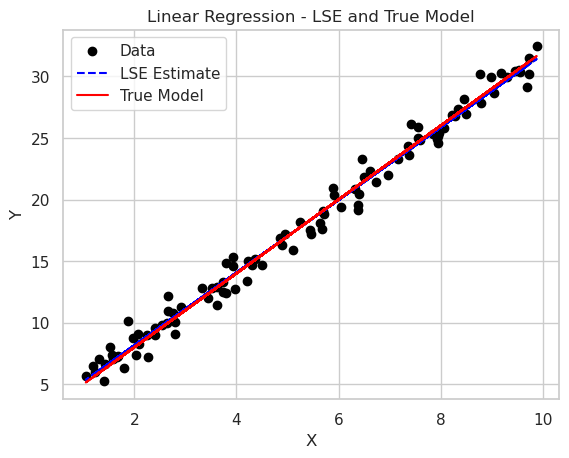

True Parameters: a = 2, b = 3
Least Squares Estimate: a = 2.2661820716715253, b = 2.948914085875222
Estimated sigma^2 (MLE): 0.8230454734357688


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data (X, Y)
np.random.seed(42)
n = 100  # Number of data points
X = np.random.uniform(1, 10, n)  # Independent variable
a_true = 2  # True value of intercept
b_true = 3  # True value of slope
sigma_true = 1  # True value of standard deviation
epsilon = np.random.normal(0, sigma_true, n)  # Normal error term
Y = a_true + b_true * X + epsilon  # Dependent variable

# Least Squares Estimation (LSE)
X_ = np.c_[np.ones(n), X]  # Add a column of ones for intercept
beta_LSE = np.linalg.inv(X_.T @ X_) @ X_.T @ Y  # Solve using the normal equation
a_LSE, b_LSE = beta_LSE

# Maximum Likelihood Estimation (MLE)
# In this case, MLE for linear regression is equivalent to Least Squares when assuming normal errors
# Thus, we use the same normal equation approach for simplicity

# Plot the data and regression lines
plt.scatter(X, Y, label='Data', color='black')
plt.plot(X, a_LSE + b_LSE * X, label='LSE Estimate', color='blue', linestyle='--')
plt.plot(X, a_true + b_true * X, label='True Model', color='red', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression - LSE and True Model')
plt.show()

# Output results
print(f"True Parameters: a = {a_true}, b = {b_true}")
print(f"Least Squares Estimate: a = {a_LSE}, b = {b_LSE}")

# Estimation of the variance (sigma^2) from the residuals
residuals = Y - (a_LSE + b_LSE * X)
sigma_est = np.sqrt(np.sum(residuals**2) / (n - 2))  # Degrees of freedom n - 2 for two parameters
print(f"Estimated sigma^2 (MLE): {sigma_est**2}")



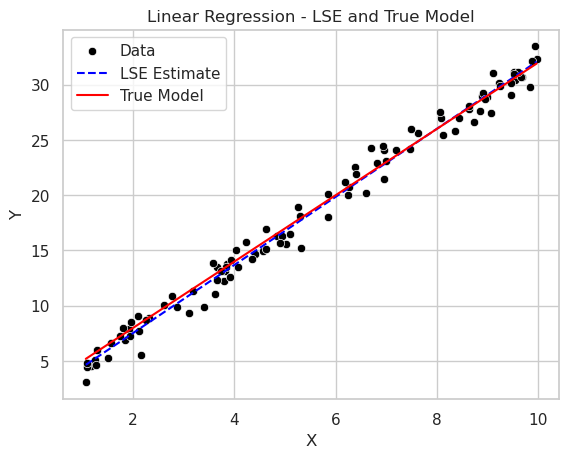

True Parameters: a = 2, b = 3
Least Squares Estimate: a = 1.3772196584524252, b = 3.0788152938753734
Estimated sigma^2 (MLE): 0.9773913948118358


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

# Generate synthetic data (X, Y) manually
n = 100  # Number of data points
X = [random.uniform(1, 10) for _ in range(n)]  # Independent variable
a_true = 2  # True value of intercept
b_true = 3  # True value of slope
sigma_true = 1  # True value of standard deviation
epsilon = [random.gauss(0, sigma_true) for _ in range(n)]  # Normal error term
Y = [a_true + b_true * x + e for x, e in zip(X, epsilon)]  # Dependent variable

# Least Squares Estimation (LSE)
# Calculating a and b using the normal equation method
# X'X * beta = X'Y, where beta = [a, b] (intercept, slope)

# Calculate means of X and Y
mean_X = sum(X) / n
mean_Y = sum(Y) / n

# Calculate the terms for the normal equation
Sxx = sum((x - mean_X) ** 2 for x in X)
Sxy = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))

# Calculate coefficients a and b
b_LSE = Sxy / Sxx
a_LSE = mean_Y - b_LSE * mean_X

# Maximum Likelihood Estimation (MLE)
# For linear regression, MLE with normal errors is equivalent to LSE, so we use the same formula for a_LSE and b_LSE

# Estimation of sigma^2 from residuals
residuals = [Y[i] - (a_LSE + b_LSE * X[i]) for i in range(n)]
sigma_est = math.sqrt(sum(r ** 2 for r in residuals) / (n - 2))

# Plotting the data and regression lines using Seaborn
sns.scatterplot(x=X, y=Y, label='Data', color='black')
sns.lineplot(x=X, y=[a_LSE + b_LSE * x for x in X], label='LSE Estimate', color='blue', linestyle='--')
sns.lineplot(x=X, y=[a_true + b_true * x for x in X], label='True Model', color='red', linestyle='-')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression - LSE and True Model')
plt.show()

# Output the results
print(f"True Parameters: a = {a_true}, b = {b_true}")
print(f"Least Squares Estimate: a = {a_LSE}, b = {b_LSE}")
print(f"Estimated sigma^2 (MLE): {sigma_est**2}")
